Kamil Schlagowski 269402

W tej pracy postaramy się użyć algorytmów genetycznych do znalezienia rozwiązania gry w statki (zatopienia wszystkich rozstawionych na planszy).

In [114]:
import pygad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from statistics import mean 
from aco import AntColony

Zainicjalizujmy zmienne potrzebne do funkcji.

In [2]:
board_size = 10
target_board = np.zeros((board_size, board_size))
board = np.zeros((board_size, board_size))
maxResult = 10
resultsList = []
timeList = []
bestResultsTimeList = []
perfectResultsTimeList = []

Będzie nam potrzebna prosta funkcja fitness, która będzie porównywać planszę z przyjętym parametrem solution. Na podstawie tych danych dowiemy się ile statków udało się zatopić algorytmowi.

In [46]:
def fitness_func(solution, solution_idx):
    board = np.zeros((len(target_board), len(target_board)))

    for i in range(0, len(solution), 2):
        row = solution[i]
        col = solution[i+1]
        board[row][col] = 1

    # Obliczenie liczby trafień
    hits = 0
    for i in range(len(target_board)):
        for j in range(len(target_board)):
            if board[i][j] == 1 and target_board[i][j] == 1:
                hits += 1
    return hits

Funkcja showResults() posłuży nam do wizualizacji otrzymanego wyniku. Statki na planszy zostaną pokolorowane na żółto. Te które zostaną trafione pozostaną żółte, na niebiesko podświetlą się nietrafione miejsca.

In [4]:
def showResults(solution):
    result = np.copy(target_board)
    board = np.zeros((len(target_board), len(target_board)))
    for i in range(0, len(solution), 2):
        row = solution[i]
        col = solution[i+1]
        board[row][col] = 1

    for i in range(len(result)):
        for j in range(len(result[0])):
            if target_board[i][j] == board[i][j]:
                result[i][j] += board[i][j]
    plt.matshow(result)
    plt.show()
    

Do lepszego zrozumienia skuteczności napisanych algorytmów posłuży nam interprateResults().

In [5]:
def interprateResults(_maxResult, _resultsList, _bestResultsTimeList, _perfectResultsTimeList):
    print("Srednia trafien wszystkich rozwiazan = ", mean([x / _maxResult for x in _resultsList]))                                
    print("Liczba rozwiazan lepszych lub rownych 90% skutecznosci = ", len(_bestResultsTimeList))
    if len(_bestResultsTimeList) > 0:
        print("Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci = ", mean(_bestResultsTimeList))
    print("Liczba rozwiazan idealnych = ", len(_perfectResultsTimeList))
    if len(_perfectResultsTimeList) > 0:
        print("Srednia czasu rozwiazan idealnych = ", mean(_perfectResultsTimeList))

Zacznijmy od plansz 5x5. Stworzymy trzy przykładowe rozstawienia statków: 1x potrójny, 2x podwójny, 3x pojedyńczy. Zwizualizujmy ją od razu.

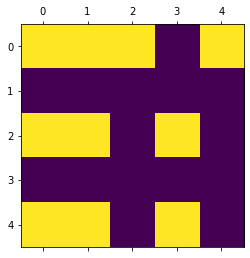

In [112]:
target_board = np.array([[1,1,1,0,1],
                         [0,0,0,0,0],
                         [1,1,0,1,0],
                         [0,0,0,0,0],
                         [1,1,0,1,0]])
plt.matshow(target_board)
plt.show()

Zobaczmy na przykładzie jak będzie wyglądać nietrafione miejsce na statku. Ustalmy losową, niedobrą liczbę dla pokoleń, rodziców, populacji i mutacji.

Liczba trafien = 9 / 10
Liczba oddanych strzalow = 26


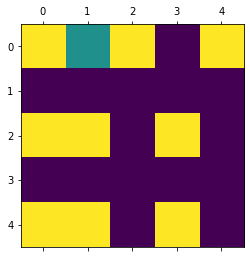

In [547]:
ga_instance = pygad.GA(num_generations=3,
                       num_parents_mating=4,
                       fitness_func=fitness_func,
                       sol_per_pop=10,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=5)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

Teraz zmieńmy wartość pokoleń na 100, choć wystarczy ich również znacznie mniejsza ilość.

Chromosomy będą długości wszystkich dostępnych pól na planszy +1 dla funkcji fitness, którą napisaliśmy tylko dla liczb parzystych. Czyli długość wyniesie 26.

Populację zatem ustawimy na 100.

Mutację weźmy najmniejszą, na jaką pozwala nam pygad, czyli 4.

In [548]:
maxResult5x5_1 = 10
resultsList5x5_1 = []
timeList5x5_1 = []
bestResultsTimeList5x5_1 = []
perfectResultsTimeList5x5_1 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_1.append(solution_fitness)
    timeList5x5_1.append(end - start)

for i in range(100):
    if resultsList5x5_1[i] == maxResult5x5_1:
        perfectResultsTimeList5x5_1.append(timeList5x5_1[i])
    if resultsList5x5_1[i]/maxResult5x5_1 >= 0.9:
        bestResultsTimeList5x5_1.append(timeList5x5_1[i])
        
interprateResults(maxResult5x5_1, resultsList5x5_1, bestResultsTimeList5x5_1, perfectResultsTimeList5x5_1)

Srednia trafien wszystkich rozwiazan =  0.997
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  0.5067929196357727
Liczba rozwiazan idealnych =  97
Srednia czasu rozwiazan idealnych =  0.507010359125039


Jak widzimy skuteczność jest bardzo wysoka.

Przejdźmy do kolejnego przykładu.

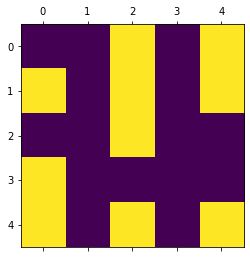

In [549]:
target_board = np.array([[0,0,1,0,1],
                         [1,0,1,0,1],
                         [0,0,1,0,0],
                         [1,0,0,0,0],
                         [1,0,1,0,1]])
plt.matshow(target_board)
plt.show()

Liczba trafien = 10 / 10
Liczba oddanych strzalow = 26


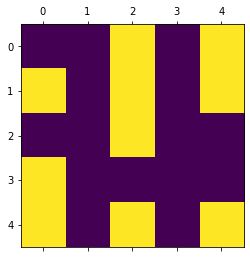

In [550]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=30,
                       fitness_func=fitness_func,
                       sol_per_pop=100,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=4)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [551]:
maxResult5x5_2 = 10
resultsList5x5_2 = []
timeList5x5_2 = []
bestResultsTimeList5x5_2 = []
perfectResultsTimeList5x5_2 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_2.append(solution_fitness)
    timeList5x5_2.append(end - start)

for i in range(100):
    if resultsList5x5_2[i] == maxResult5x5_2:
        perfectResultsTimeList5x5_2.append(timeList5x5_2[i])
    if resultsList5x5_2[i]/maxResult5x5_2 >= 0.9:
        bestResultsTimeList5x5_2.append(timeList5x5_2[i])
        
interprateResults(maxResult5x5_2, resultsList5x5_2, bestResultsTimeList5x5_2, perfectResultsTimeList5x5_2)

Srednia trafien wszystkich rozwiazan =  0.999
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  0.5132656383514405
Liczba rozwiazan idealnych =  99
Srednia czasu rozwiazan idealnych =  0.5131075719390252


Tutaj skuteczność wyszła nam jeszcze większa.

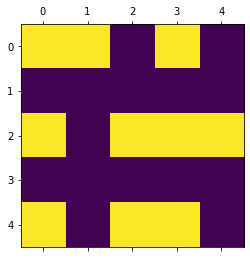

In [552]:
target_board = np.array([[1,1,0,1,0],
                         [0,0,0,0,0],
                         [1,0,1,1,1],
                         [0,0,0,0,0],
                         [1,0,1,1,0]])
plt.matshow(target_board)
plt.show()

Liczba trafien = 10 / 10
Liczba oddanych strzalow = 26


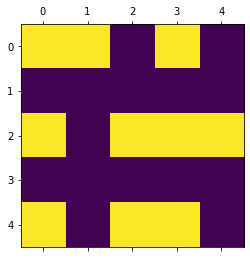

In [553]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=30,
                       fitness_func=fitness_func,
                       sol_per_pop=100,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=4)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [554]:
maxResult5x5_3 = 10
resultsList5x5_3 = []
timeList5x5_3 = []
bestResultsTimeList5x5_3 = []
perfectResultsTimeList5x5_3 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_3.append(solution_fitness)
    timeList5x5_3.append(end - start)

for i in range(100):
    if resultsList5x5_3[i] == maxResult5x5_3:
        perfectResultsTimeList5x5_3.append(timeList5x5_3[i])
    if resultsList5x5_3[i]/maxResult5x5_3 >= 0.9:
        bestResultsTimeList5x5_3.append(timeList5x5_3[i])
        
interprateResults(maxResult5x5_3, resultsList5x5_3, bestResultsTimeList5x5_3, perfectResultsTimeList5x5_3)

Srednia trafien wszystkich rozwiazan =  0.999
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  0.528566927909851
Liczba rozwiazan idealnych =  99
Srednia czasu rozwiazan idealnych =  0.5287409117727568


Otrzymaliśmy podobny wynik.

Zobaczmy jeszcze jeden przykład dla testu.

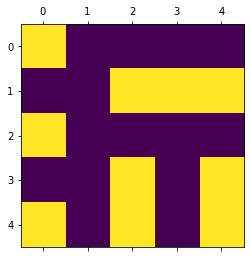

In [29]:
target_board = np.array([[1,0,0,0,0],
                         [0,0,1,1,1],
                         [1,0,0,0,0],
                         [0,0,1,0,1],
                         [1,0,1,0,1]])
plt.matshow(target_board)
plt.show()

Liczba trafien = 10 / 10
Liczba oddanych strzalow = 26


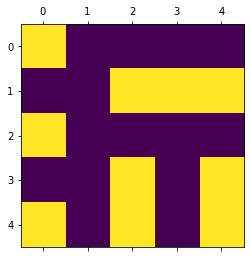

In [30]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=30,
                       fitness_func=fitness_func,
                       sol_per_pop=100,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=4)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [557]:
maxResult5x5_4 = 10
resultsList5x5_4 = []
timeList5x5_4 = []
bestResultsTimeList5x5_4 = []
perfectResultsTimeList5x5_4 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_4.append(solution_fitness)
    timeList5x5_4.append(end - start)

for i in range(100):
    if resultsList5x5_4[i] == maxResult5x5_4:
        perfectResultsTimeList5x5_4.append(timeList5x5_4[i])
    if resultsList5x5_4[i]/maxResult5x5_4 >= 0.9:
        bestResultsTimeList5x5_4.append(timeList5x5_4[i])
        
interprateResults(maxResult5x5_4, resultsList5x5_4, bestResultsTimeList5x5_4, perfectResultsTimeList5x5_4)

Srednia trafien wszystkich rozwiazan =  0.997
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  0.5415024065971374
Liczba rozwiazan idealnych =  97
Srednia czasu rozwiazan idealnych =  0.5410310558437073


Jak widzimy algorytm świetnie radzi sobie z powierzonym zadaniem. Zobaczmy zatem czy tak samo dobrze mu pójdzie z planszą standardowej wielkości 10x10.

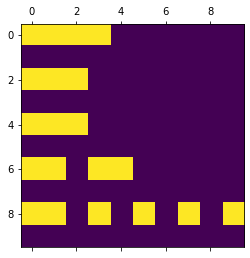

In [60]:
target_board = np.array([[1,1,1,1,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,1,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,0,1,0,1,0,1],
                            [0,0,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

Tutaj chromosom będzie długości 100.

Populację zwiększymy do 300.

Krzyżujących się rodziców ustawmy na 30% osobników.

Mutację natomiast możemy zmniejszyć do najniższej możliwej wartości, czyli 1.

Liczba trafien = 20 / 20
Liczba oddanych strzalow = 100


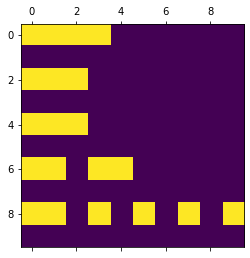

In [64]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=90,
                       fitness_func=fitness_func,
                       sol_per_pop=300,
                       num_genes=target_board.size,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 20")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [65]:
maxResult10x10_1 = 20
resultsList10x10_1 = []
timeList10x10_1 = []
bestResultsTimeList10x10_1 = []
perfectResultsTimeList10x10_1 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=90,
                        fitness_func=fitness_func,
                        sol_per_pop=300,
                        num_genes=target_board.size,
                        gene_type=int,
                        init_range_low=0,
                        init_range_high=target_board.shape[0],
                        mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList10x10_1.append(solution_fitness)
    timeList10x10_1.append(end - start)

for i in range(100):
    if resultsList10x10_1[i] == maxResult10x10_1:
        perfectResultsTimeList10x10_1.append(timeList10x10_1[i])
    if resultsList10x10_1[i]/maxResult10x10_1 >= 0.9:
        bestResultsTimeList10x10_1.append(timeList10x10_1[i])

interprateResults(maxResult10x10_1, resultsList10x10_1, bestResultsTimeList10x10_1, perfectResultsTimeList10x10_1)

Srednia trafien wszystkich rozwiazan =  1.0
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  3.31072660446167
Liczba rozwiazan idealnych =  100
Srednia czasu rozwiazan idealnych =  3.31072660446167


Jak widzimy, tutaj algorytm genetyczny również radzi sobie świetnie. Otrzymaliśmy 100% rozwiązania kosztem trochę dłuższego czasu obliczeniowego.

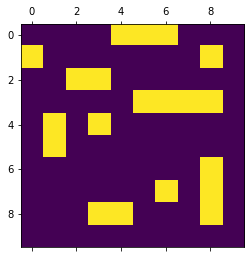

In [66]:
target_board =np.array([[0,0,0,0,1,1,1,0,0,0],
                        [1,0,0,0,0,0,0,0,1,0],
                        [0,0,1,1,0,0,0,0,0,0],
                        [0,0,0,0,0,1,1,1,1,0],
                        [0,1,0,1,0,0,0,0,0,0],
                        [0,1,0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,1,0,1,0],
                        [0,0,0,1,1,0,0,0,1,0],
                        [0,0,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

Liczba trafien = 20 / 20
Liczba oddanych strzalow = 100


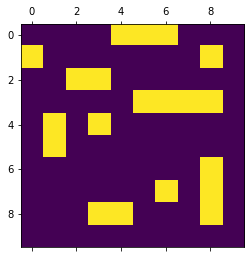

In [68]:
num_genes=target_board.size
ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=90,
                    fitness_func=fitness_func,
                    sol_per_pop=300,
                    num_genes=target_board.size,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 20")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [69]:
maxResult10x10_2 = 20
resultsList10x10_2 = []
timeList10x10_2 = []
bestResultsTimeList10x10_2 = []
perfectResultsTimeList10x10_2 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                        num_parents_mating=90,
                        fitness_func=fitness_func,
                        sol_per_pop=300,
                        num_genes=target_board.size,
                        gene_type=int,
                        init_range_low=0,
                        init_range_high=target_board.shape[0],
                        mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList10x10_2.append(solution_fitness)
    timeList10x10_2.append(end - start)

for i in range(100):
    if resultsList10x10_2[i] == maxResult10x10_2:
        perfectResultsTimeList10x10_2.append(timeList10x10_2[i])
    if resultsList10x10_2[i]/maxResult10x10_2 >= 0.9:
        bestResultsTimeList10x10_2.append(timeList10x10_2[i])

interprateResults(maxResult10x10_2, resultsList10x10_2, bestResultsTimeList10x10_2, perfectResultsTimeList10x10_2)

Srednia trafien wszystkich rozwiazan =  1.0
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  1.6774386548995972
Liczba rozwiazan idealnych =  100
Srednia czasu rozwiazan idealnych =  1.6774386548995972


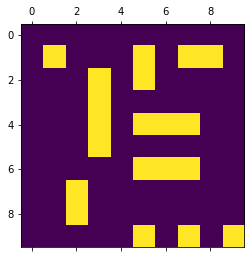

In [70]:
target_board =np.array([[0,0,0,0,0,0,0,0,0,0],
                        [0,1,0,0,0,1,0,1,1,0],
                        [0,0,0,1,0,1,0,0,0,0],
                        [0,0,0,1,0,0,0,0,0,0],
                        [0,0,0,1,0,1,1,1,0,0],
                        [0,0,0,1,0,0,0,0,0,0],
                        [0,0,0,0,0,1,1,1,0,0],
                        [0,0,1,0,0,0,0,0,0,0],
                        [0,0,1,0,0,0,0,0,0,0],
                        [0,0,0,0,0,1,0,1,0,1]])
plt.matshow(target_board)
plt.show()

Liczba trafien = 20 / 20
Liczba oddanych strzalow = 100


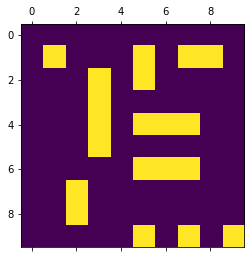

In [71]:
num_genes=target_board.size
ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=90,
                    fitness_func=fitness_func,
                    sol_per_pop=300,
                    num_genes=target_board.size,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 20")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [72]:
maxResult10x10_3 = 20
resultsList10x10_3 = []
timeList10x10_3 = []
bestResultsTimeList10x10_3 = []
perfectResultsTimeList10x10_3 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                        num_parents_mating=90,
                        fitness_func=fitness_func,
                        sol_per_pop=300,
                        num_genes=target_board.size,
                        gene_type=int,
                        init_range_low=0,
                        init_range_high=target_board.shape[0],
                        mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList10x10_3.append(solution_fitness)
    timeList10x10_3.append(end - start)

for i in range(100):
    if resultsList10x10_3[i] == maxResult10x10_3:
        perfectResultsTimeList10x10_3.append(timeList10x10_3[i])
    if resultsList10x10_3[i]/maxResult10x10_3 >= 0.9:
        bestResultsTimeList10x10_3.append(timeList10x10_3[i])

interprateResults(maxResult10x10_3, resultsList10x10_3, bestResultsTimeList10x10_3, perfectResultsTimeList10x10_3)

Srednia trafien wszystkich rozwiazan =  1.0
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  1.6736967611312865
Liczba rozwiazan idealnych =  100
Srednia czasu rozwiazan idealnych =  1.6736967611312865


Na wszystkich trzech przykładach wynik wyszedł perfekcyjny.

Ustalmy teraz niestandardową wersję gry w statki na planszy 15x15, gdzie dodamy statek wielkości 6 i odpowiednio wiele mniejszych.

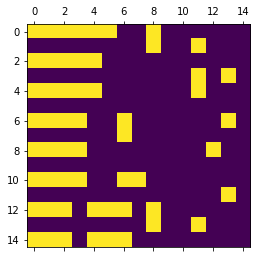

In [96]:
target_board = np.array([[1,1,1,1,1,1,0,0,1,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,1,0,0,1,0,0,0],
                         [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0],
                         [1,1,1,1,1,0,0,0,0,0,0,1,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,0,1,0,0,0,0,0,0,1,0],
                         [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,0,0,0,0,0,0,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,0,1,1,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                         [1,1,1,0,1,1,1,0,1,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,1,0,0,1,0,0,0],
                         [1,1,1,0,1,1,1,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

W tym miejscu możemy się już pokusić o zmniejszenie liczby pokoleń ze względu na dłuższy czas wykonywania algorytmu. Problem staje się skomplikowany, więc jeśli wyniki będą niezadowalające zawsze możemy zwiększyć ich ilość.

Przyjmijmy odpowiednio większą populację i rodziców.

Liczba trafien = 56 / 56
Liczba oddanych strzalow = 226


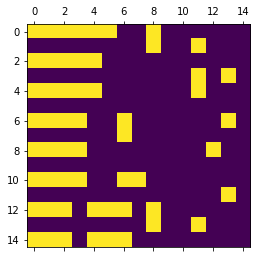

In [76]:
ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 56")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [77]:
maxResult15x15_1 = 56
resultsList15x15_1 = []
timeList15x15_1 = []
bestResultsTimeList15x15_1 = []
perfectResultsTimeList15x15_1 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList15x15_1.append(solution_fitness)
    timeList15x15_1.append(end - start)

for i in range(100):
    if resultsList15x15_1[i] == maxResult15x15_1:
        perfectResultsTimeList15x15_1.append(timeList15x15_1[i])
    if resultsList15x15_1[i]/maxResult15x15_1 >= 0.9:
        bestResultsTimeList15x15_1.append(timeList15x15_1[i])

interprateResults(maxResult15x15_1, resultsList15x15_1, bestResultsTimeList15x15_1, perfectResultsTimeList15x15_1)

Srednia trafien wszystkich rozwiazan =  0.9971428571428571
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  5.69042227268219
Liczba rozwiazan idealnych =  86
Srednia czasu rozwiazan idealnych =  5.676117300987244


Jak widzimy możemy otrzymać rozwiązanie perfekcyjne, natomiast wszystkie ze 100 rozwiązań były lepsze niż 90% skuteczności.

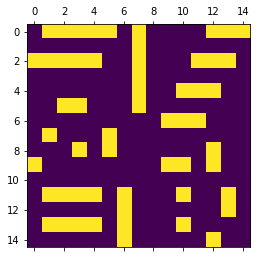

In [78]:
target_board =np.array([[0,1,1,1,1,1,0,1,0,0,0,0,1,1,1],
                        [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                        [1,1,1,1,1,0,0,1,0,0,0,1,1,1,0],
                        [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,1,0,0,1,1,1,0,0],
                        [0,0,1,1,0,0,0,1,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0,0,1,1,1,0,0,0],
                        [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
                        [0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],
                        [1,0,0,0,0,0,0,0,0,1,1,0,1,0,0],
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                        [0,1,1,1,1,0,1,0,0,0,1,0,0,1,0],
                        [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
                        [0,1,1,1,1,0,1,0,0,0,1,0,0,0,0],
                        [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0]])
plt.matshow(target_board)
plt.show()

Liczba trafien = 56 / 56
Liczba oddanych strzalow = 226


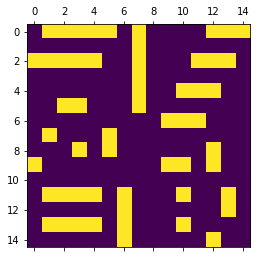

In [88]:
ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=180,
                    fitness_func=fitness_func,
                    sol_per_pop=600,
                    num_genes=target_board.size+1,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 56")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [89]:
maxResult15x15_2 = 56
resultsList15x15_2 = []
timeList15x15_2 = []
bestResultsTimeList15x15_2 = []
perfectResultsTimeList15x15_2 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=180,
                    fitness_func=fitness_func,
                    sol_per_pop=600,
                    num_genes=target_board.size+1,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList15x15_2.append(solution_fitness)
    timeList15x15_2.append(end - start)

for i in range(100):
    if resultsList15x15_2[i] == maxResult15x15_2:
        perfectResultsTimeList15x15_2.append(timeList15x15_2[i])
    if resultsList15x15_2[i]/maxResult15x15_2 >= 0.9:
        bestResultsTimeList15x15_2.append(timeList15x15_2[i])

interprateResults(maxResult15x15_2, resultsList15x15_2, bestResultsTimeList15x15_2, perfectResultsTimeList15x15_2)

Srednia trafien wszystkich rozwiazan =  0.9907142857142857
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  100
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  6.6030291223526
Liczba rozwiazan idealnych =  60
Srednia czasu rozwiazan idealnych =  6.617070146401724


Na tym przykładzie liczba rozwiązań idealnych jest jeszcze niższa, natomiast dalej 100% rozwiązań osiąga skuteczność nie gorszą niż 90%.

Korzystając z tego, że mamy jeszcze dużo miejsca na planszy zobaczmy jak algorytm sobie poradzi gdy dodamy mu statek długości 7 i odpowiednio więcej mniejszych.

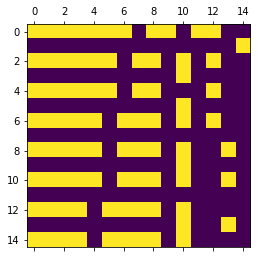

In [98]:
target_board = np.array([[1,1,1,1,1,1,1,0,1,1,0,1,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                         [1,1,1,1,1,1,0,1,1,0,1,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                         [1,1,1,1,1,1,0,1,1,0,0,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                         [1,1,1,1,1,0,1,1,1,0,1,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,1,0,1,1,1,0,1,0,0,1,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                         [1,1,1,1,1,0,1,1,1,0,1,0,0,1,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,1,1,1,1,0,1,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,1,0],
                         [1,1,1,1,0,1,1,1,1,0,1,0,0,0,0],])
plt.matshow(target_board)
plt.show()

Plansza już nam się na prawdę mocno zapełniła.

Liczba trafien = 84 / 84
Liczba oddanych strzalow = 226


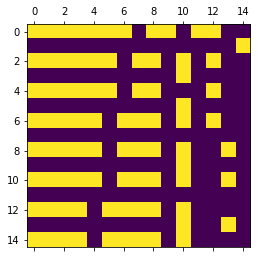

In [93]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Liczba trafien = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 84")
print("Liczba oddanych strzalow =", len(solution))
showResults(solution)

In [95]:
maxResult15x15_3 = 84
resultsList15x15_3 = []
timeList15x15_3 = []
bestResultsTimeList15x15_3 = []
perfectResultsTimeList15x15_3 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList15x15_3.append(solution_fitness)
    timeList15x15_3.append(end - start)

for i in range(100):
    if resultsList15x15_3[i] == maxResult15x15_3:
        perfectResultsTimeList15x15_3.append(timeList15x15_3[i])
    if resultsList15x15_3[i]/maxResult15x15_3 >= 0.9:
        bestResultsTimeList15x15_3.append(timeList15x15_3[i])

interprateResults(maxResult15x15_3, resultsList15x15_3, bestResultsTimeList15x15_3, perfectResultsTimeList15x15_3)

Srednia trafien wszystkich rozwiazan =  0.9382142857142857
Liczba rozwiazan lepszych lub rownych 90% skutecznosci =  97
Srednia czasu rozwiazan lepszych lub rownych 90% skutecznosci =  6.070604110501476
Liczba rozwiazan idealnych =  0


Niestety program nie poradził sobie z tym zadaniem tak dobrze jak ze wcześniejszymi. Mimo pierwszego perfekcyjnego testu, na 100 kolejnych nie udało mu się ani razu zdobyć takiego wyniku. Być może trudniej mu odnaleźć schemat przy takich danych wejściowych.

Niemniej 97% testowanych przypadków miało średnią ~94% trafień.

Porównajmy teraz algorytm genetyczny do kolonii mrówek.

Ustalmy koordynaty pól, na których pływają statki.

In [138]:
COORDS5x5_1 = (
    (0,0),(0,1),(0,2),(0,4),(2,0),
    (2,1),(2,3),(4,0),(4,1),(4,3)
)

In [144]:
%%capture test
start = time.time()

colony = AntColony(COORDS5x5_1, ant_count=100, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodes = colony.get_path()
optimal_nodes = list(dict.fromkeys(optimal_nodes)) #remove duplicates
end = time.time()
colonyTime5x5_1 = end - start

In [145]:
hits = 0
for i in COORDS5x5_1:
    for j in optimal_nodes:
        if i == j:
            hits += 1
print("Liczba trafien = ", hits, "/ 10")

Liczba trafien =  10 / 10


Jak widzimy, dla planszy 5x5 kolonia poradziła sobie bardzo dobrze.

In [ ]:
target_board = np.array([[1,1,1,1,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                           4[1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,1,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,0,1,0,1,0,1],
                            [0,0,0,0,0,0,0,0,0,0]])

Sprawdźmy to samo dla wielkości 10x10.

In [146]:
COORDS10x10_1 = (
    (0,0),(0,1),(0,2),(0,3),(2,0),(2,1),(2,2),(4,0),(4,1),(4,2),
    (6,0),(6,1),(6,3),(6,4),(8,0),(8,1),(8,3),(8,5),(8,7),(8,9)
)

In [147]:
%%capture test
start = time.time()
colony = AntColony(COORDS10x10_1, ant_count=100, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodes = colony.get_path()
optimal_nodes = list(dict.fromkeys(optimal_nodes)) #remove duplicates
end = time.time()
colonyTime10x10_1 = end - start

In [148]:
hits = 0
for i in COORDS10x10_1:
    for j in optimal_nodes:
        if i == j:
            hits += 1
print("Liczba trafien = ", hits, "/ 20")

Liczba trafien =  17 / 20


Otrzymaliśmy dokładność rzędu 85%.

Zobaczmy na koniec 15x15.

In [128]:
COORDS15x15_1 = (
    (0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,8),(1,8),(0,11),(2,0),(2,1),(2,2),(2,3),(2,4),
    (3,13),(3,11),(4,0),(4,1),(4,2),(4,3),(4,4),(4,11),(6,0),(6,1),(6,2),(6,3),(6,6),(6,13),
    (7,6),(8,0),(8,1),(8,2),(8,3),(8,12),(10,0),(10,1),(10,2),(10,3),(10,7),(10,8),(11,13),(12,0),
    (12,1),(12,2),(12,4),(12,5),(12,6),(12,8),(13,8),(13,11),(14,0),(14,1),(14,2),(14,4),(14,5),(14,6),
)

In [131]:
%%capture test
start = time.time()
colony = AntColony(COORDS15x15_1, ant_count=100, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodes = colony.get_path()
optimal_nodes = list(dict.fromkeys(optimal_nodes)) #remove duplicates
end = time.time()
colonyTime15x15_1 = end - start

In [133]:
hits = 0
for i in COORDS15x15_1:
    for j in optimal_nodes:
        if i == j:
            hits += 1
print("Liczba trafien = ", hits, "/ 56")

Liczba trafien =  56 / 56


Co ciekawe, tym razem doszliśmy do wyniku 56/56. Prawdopodobnie duży wpływ na wynik ma ułożenie planszy, co w przypadku algorytmów genetycznych nie grało tak dużej roli. 

Na koniec porównajmy czas potrzebny na obliczenia dla poszczególnych przypadków.

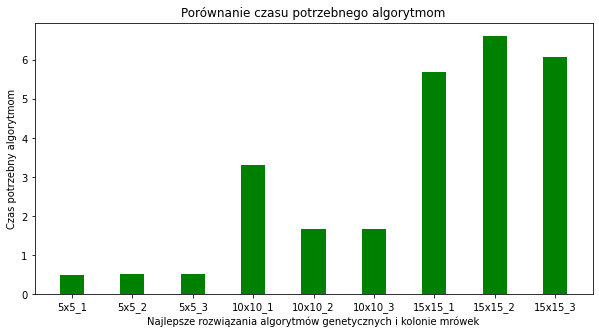

In [154]:
data = {'5x5_1': 0.5070, '5x5_2': 0.5131, '5x5_3': 0.5287,
        '10x10_1': 3.3107, '10x10_2': 1.6774, '10x10_3': 1.6736,
        '15x15_1': 5.6761, '15x15_2': 6.6170, '15x15_3': 6.0706,
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Najlepsze rozwiązania algorytmów genetycznych i kolonie mrówek")
plt.ylabel("Czas potrzebny algorytmom")
plt.title("Porównanie czasu potrzebnego algorytmom")
plt.show()

Intuicyjnie im większa plansza, tym większy czas, którego potrzebuje algorytm.

Dlaczego jednak rozwiązanie pierwszej planszy 10x10 zajęło algorytmowi prawie dwa razy więcej czasu? Spójrzmy jeszcze raz na to jak wyglądało to rozstawienie.

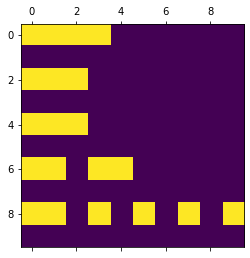

In [155]:
target_board = np.array([[1,1,1,1,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,1,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,0,1,0,1,0,1],
                            [0,0,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

Jest dosyć niestandardowe, co może wpłynąć na czas potrzebny do znalezienia najlepszego rozwiązania.

Porównajmy algorytmy genetyczne do kolonii mrówek.

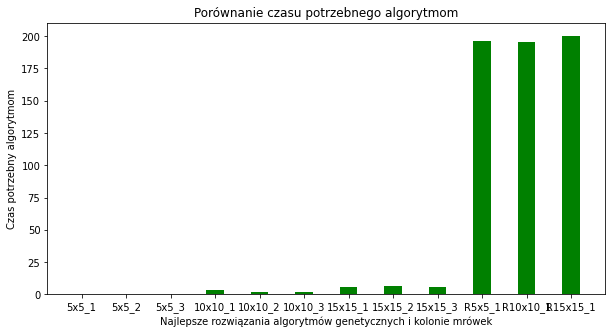

In [156]:
data = {'5x5_1': 0.5070, '5x5_2': 0.5131, '5x5_3': 0.5287,
        '10x10_1': 3.3107, '10x10_2': 1.6774, '10x10_3': 1.6736,
        '15x15_1': 5.6761, '15x15_2': 6.6170, '15x15_3': 6.0706,
        'R5x5_1': colonyTime5x5_1, 'R10x10_1': colonyTime10x10_1, 'R15x15_1': colonyTime15x15_1,
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Najlepsze rozwiązania algorytmów genetycznych i kolonie mrówek")
plt.ylabel("Czas potrzebny algorytmom")
plt.title("Porównanie czasu potrzebnego algorytmom")
plt.show()

Jak widzimy przepaść jest ogromna i chociaż kolonie radziły sobie całkiem nieźle, to ewidentnie nie są stworzone do gry w statki.